<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/8_Regresion_No_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install scipy

In [ ]:
%pip install sklearn

In [1]:
#Cargamos librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [ ]:
#Cargar archivo csv desde seaborn
df=sns.load_dataset(name='car_crashes')
df.head(5)

In [ ]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(df)

In [5]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['ins_losses']]
Var_Dep= df['total']

In [6]:
#Redefinimos las variables 
x= Vars_Indep
y= Var_Dep

   ** Usamos las siguientes ecuaciones como funciones de ajuste.**

            y = ax^2 + bx + c   ("Función cuadrática")

            y = a*exp(bx) + c   ("Función exponencial")

            y = 1/a*x           ("Función inversa")

            y = a*np.sin(x) + b ("Función senoidal")

            y = a*np.tan(x) + b ("Función tangencial")

            y = a*np.abs(x) + b*x + c (Función Valor absoluto)

            y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

            y = a*np.log(x) + b  (Función logaritmica)

            y = a*x + b*x + c*x (Función lineal con producto de coeficientes)

            y = 1/a*x**2  (Función cuadrática inversa)

            y = a/b*x**2 + c*x (Función polinomial inversa)





**MODELO 1**

In [7]:
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

In [8]:
#Ajustamos los parámetros de la función curve_fit
parametros, covs= curve_fit(func1, df['ins_losses'], df['total'])

In [9]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros

array([ 6.31404246e-04, -1.78288232e-01,  2.79658165e+01])

In [11]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros, _ = curve_fit(func1, df['ins_losses'], df['total'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = a * x ** 2 + b * x + c

In [12]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#x= x.reshape(51, 1)
#y = y.reshape(51, 1)
#yfit1 = yfit1.reshape(51, 1)
yfit1

,ins_losses
0,15.389687
1,15.413326
2,15.980397
3,15.381021
4,15.757437
5,15.381127
6,15.801567
7,15.447037
8,15.396744
9,15.385770


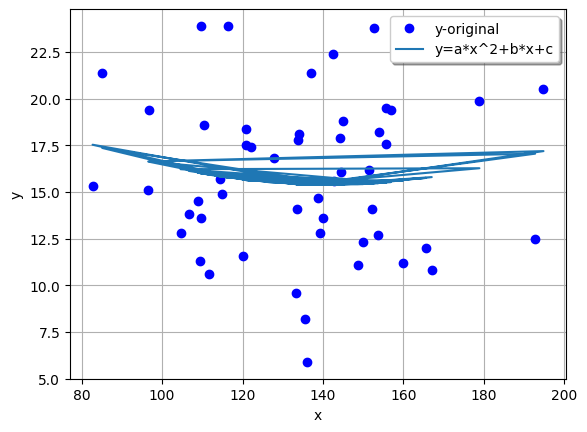

In [13]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [14]:
#Calculamos el coeficiente de determinación del modelo

R2 = r2_score(y, yfit1) 
R2

0.017528478101237477

**MODELO 2**

In [15]:
def func2(x, a, b, c):
    return a*np.exp(b*x)+c
    




In [16]:
#Ajustamos los parámetros de la función curve_fit
parametros2, covs2= curve_fit(func2, df['ins_losses'], df['total'])

C:\Users\alfre\AppData\Local\Temp\ipykernel_20584\2800873776.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, covs2= curve_fit(func2, df['ins_losses'], df['total'])


In [17]:
#Obtenemos los coeficientes del modelo de regresión no lineal
parametros2

array([1.67134480e-14, 9.99999998e-01, 1.00000000e+00])

In [18]:
#Creamos el modelo de predicción con los parámetros obtenidos 
parametros2, _ = curve_fit(func2, df['ins_losses'], df['total'])
a2, b2, c2 = parametros2[ 0 ], parametros2[ 1 ], parametros2[ 2 ]
yfit2 = a2*np.exp(x*b2)+c2

C:\Users\alfre\AppData\Local\Temp\ipykernel_20584\337478338.py:2: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros2, _ = curve_fit(func2, df['ins_losses'], df['total'])


In [19]:
#Calculamos las predicciones y reestructuramos el vector de predicciones
#yfit2 = yfit2.reshape(51, 1)
yfit2

,ins_losses
0,1.700237e+49
1,2.444139e+44
2,1.404307e+34
3,1.154137e+48
4,1.429753e+58
5,9.665112e+46
6,5.740243e+58
7,1.023279e+52
8,2.036246e+45
9,6.912646e+48


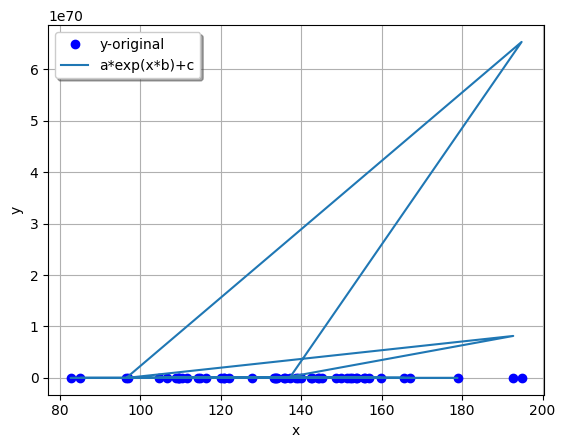

In [20]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit2, label="a*exp(x*b)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

In [21]:
#Calculamos el coeficiente de determinación del modelo
R2 = r2_score(y, yfit2) 
R2

-5.09834981244113e+138